## This jupyter notebook uses the supervized learning techniques to explore the potential of grain yield prediction from hyperspectral data

In [1]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.mixture import GaussianMixture

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from matplotlib import  pyplot as plt
import numpy as np
import pandas as pd
from imageio import imread
from time import time as timer
import os
import tarfile

import tensorflow as tf

%matplotlib inline
import umap
from matplotlib import animation
from IPython.display import HTML

from scipy.stats import entropy
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the needed python libraries by executing this python code (press ctrl enter)
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd
import io
import os

import seaborn as sns
import statsmodels.api as sm
from scipy import stats

In [3]:
Final_merged_df_HS= pd.read_csv("Final_merged_df_HS.csv",  sep=",")
Final_merged_df_HS

,rflt_359,rflt_360,rflt_361,rflt_362,rflt_363,rflt_364,rflt_365,rflt_366,rflt_367,rflt_368,...,MeanMSR_Re717_BHPH,MeanLAIBHHPH,MeanLAIBHPH,Date_R_NDRE717,R_NDRE717,Date_R_NDRE717_BHHPH,R_NDRE717_BHHPH,YieldGrain0PercKgM2,HIgrain_g,Histraw_g
0,0.018496,0.018435,0.018400,0.018405,0.018403,0.018397,0.018387,0.018440,0.018525,0.018520,...,1.100238,3.367222,3.136667,20210527,0.564690,20210518&27&0603,0.562016,0.708323,88.5,86.3
1,0.020588,0.020687,0.020785,0.020865,0.020946,0.021021,0.021073,0.021132,0.021188,0.021193,...,0.416664,1.685556,1.465000,20210527,0.240186,20210518&27&0603,0.257691,0.319911,72.2,123.9
2,0.011134,0.011124,0.011104,0.011091,0.011060,0.011027,0.011021,0.011047,0.011089,0.011094,...,0.919589,2.987222,3.137500,20210527,0.503334,20210518&27&0603,0.502541,0.665302,61.4,70.3
3,0.014384,0.014365,0.014328,0.014269,0.014220,0.014181,0.014157,0.014164,0.014190,0.014202,...,0.939131,3.116111,2.858333,20210527,0.526015,20210518&27&0603,0.522559,0.586376,55.6,81.0
4,0.031535,0.031565,0.031607,0.031671,0.031738,0.031801,0.031855,0.031862,0.031833,0.031797,...,0.882945,2.810556,2.635000,20210527,0.490496,20210518&27&0603,0.489624,NaN,64.3,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0.019242,0.019225,0.019217,0.019220,0.019220,0.019213,0.019193,0.019167,0.019142,0.019142,...,1.743544,6.042778,6.188333,20220602,0.647410,20220506&0602&15,0.625584,0.779080,NaN,NaN
342,0.019873,0.019854,0.019848,0.019870,0.019876,0.019877,0.019889,0.019899,0.019909,0.019929,...,1.628855,7.557778,7.463333,20220602,0.637141,20220506&0602&15,0.621880,0.766578,NaN,NaN
343,0.017100,0.017062,0.017031,0.016999,0.016990,0.016984,0.016945,0.016906,0.016873,0.016852,...,1.849857,6.806111,6.851667,20220602,0.666501,20220506&0602&15,0.659692,0.806605,NaN,NaN
344,0.027034,0.027032,0.027038,0.027049,0.027046,0.027034,0.027017,0.027002,0.026989,0.026977,...,1.374327,3.890556,3.947500,20220602,0.552042,20220506&0602&15,0.534020,0.656806,NaN,NaN


In [4]:
Selected_Features=["rflt_700","rflt_710","rflt_720","rflt_730","rflt_740","rflt_770","rflt_780","rflt_790","rflt_800","rflt_850","rflt_900","rflt_1050","rflt_1100","rflt_1550","rflt_1800","rflt_1975","rflt_2000"]
print(Selected_Features)
print(len(Selected_Features))

['rflt_700', 'rflt_710', 'rflt_720', 'rflt_730', 'rflt_740', 'rflt_770', 'rflt_780', 'rflt_790', 'rflt_800', 'rflt_850', 'rflt_900', 'rflt_1050', 'rflt_1100', 'rflt_1550', 'rflt_1800', 'rflt_1975', 'rflt_2000']
17


In [5]:
Final_merged_df_HS.columns

Index(['rflt_359', 'rflt_360', 'rflt_361', 'rflt_362', 'rflt_363', 'rflt_364',
       'rflt_365', 'rflt_366', 'rflt_367', 'rflt_368',
       ...
       'MeanMSR_Re717_BHPH', 'MeanLAIBHHPH', 'MeanLAIBHPH', 'Date_R_NDRE717',
       'R_NDRE717', 'Date_R_NDRE717_BHHPH', 'R_NDRE717_BHHPH',
       'YieldGrain0PercKgM2', 'HIgrain_g', 'Histraw_g'],
      dtype='object', length=1960)

In [54]:
# Select columns
Final_merged_df_HS_sub = Final_merged_df_HS[['rflt_700', 'rflt_710', 'rflt_720', 'rflt_730', 'rflt_740', 'rflt_770', 'rflt_780', 'rflt_790', 'rflt_800', 'rflt_850', 'rflt_900', 'rflt_1050', 'rflt_1100', 'rflt_1550', 'rflt_1800', 'rflt_1975', 'rflt_2000','YieldGrain0PercKgM2','site','Year']]

print(Final_merged_df_HS_sub)

     rflt_700  rflt_710  rflt_720  rflt_730  rflt_740  rflt_770  rflt_780  \
0    0.059242  0.105909  0.175623  0.286699  0.429009  0.640132  0.651862   
1    0.134834  0.169693  0.205430  0.241468  0.270126  0.302476  0.306683   
2    0.072774  0.124739  0.193750  0.288756  0.391579  0.516442  0.523570   
3    0.073408  0.116500  0.174001  0.254887  0.343721  0.451229  0.457561   
4    0.118177  0.181605  0.259504  0.359943  0.462019  0.582121  0.588849   
..        ...       ...       ...       ...       ...       ...       ...   
341  0.074042  0.126876  0.200360  0.311026  0.450229  0.676863  0.692912   
342  0.077875  0.142358  0.234362  0.378024  0.563757  0.871430  0.892288   
343  0.063623  0.121177  0.207642  0.348521  0.539583  0.878975  0.902156   
344  0.087946  0.147718  0.229362  0.347977  0.487174  0.687340  0.701247   
345  0.057213  0.103807  0.173976  0.291213  0.453120  0.739194  0.759175   

     rflt_790  rflt_800  rflt_850  rflt_900  rflt_1050  rflt_1100  rflt_155

In [104]:
# Remove rows with any NaN values
Final_merged_df_HS_sub_clean = Final_merged_df_HS_sub.dropna()

print(Final_merged_df_HS_sub_clean)

     rflt_700  rflt_710  rflt_720  rflt_730  rflt_740  rflt_770  rflt_780  \
0    0.059242  0.105909  0.175623  0.286699  0.429009  0.640132  0.651862   
1    0.134834  0.169693  0.205430  0.241468  0.270126  0.302476  0.306683   
2    0.072774  0.124739  0.193750  0.288756  0.391579  0.516442  0.523570   
3    0.073408  0.116500  0.174001  0.254887  0.343721  0.451229  0.457561   
5    0.052974  0.099807  0.161836  0.255170  0.371476  0.533450  0.543391   
..        ...       ...       ...       ...       ...       ...       ...   
341  0.074042  0.126876  0.200360  0.311026  0.450229  0.676863  0.692912   
342  0.077875  0.142358  0.234362  0.378024  0.563757  0.871430  0.892288   
343  0.063623  0.121177  0.207642  0.348521  0.539583  0.878975  0.902156   
344  0.087946  0.147718  0.229362  0.347977  0.487174  0.687340  0.701247   
345  0.057213  0.103807  0.173976  0.291213  0.453120  0.739194  0.759175   

     rflt_790  rflt_800  rflt_850  rflt_900  rflt_1050  rflt_1100  rflt_155

In [8]:
X_Features=Final_merged_df_HS_sub_clean[Selected_Features].values
print(X_Features)

[[0.059242 0.105909 0.175623 ... 0.192587 0.061161 0.039951]
 [0.134834 0.169693 0.20543  ... 0.212594 0.093005 0.068976]
 [0.072774 0.124739 0.19375  ... 0.138178 0.       0.021118]
 ...
 [0.063623 0.121177 0.207642 ... 0.211241 0.019447 0.031127]
 [0.087946 0.147718 0.229362 ... 0.204895 0.026937 0.031824]
 [0.057213 0.103807 0.173976 ... 0.172565 0.021623 0.022019]]


In [9]:
type(X_Features)

numpy.ndarray

In [10]:
Y_Variable=Final_merged_df_HS_sub_clean['YieldGrain0PercKgM2'].values
print(Y_Variable)

[0.7083233  0.31991099 0.66530162 0.58637591 0.77160544 0.72292497
 0.62620464 0.27553737 0.73150793 0.63327302 0.48848665 0.74749187
 0.52466769 0.73263932 0.43111267 0.75889459 0.61214801 0.68128326
 0.72214119 0.55652422 0.29092675 0.7265751  0.54987965 0.63854233
 0.31719493 0.30862176 0.59526811 0.72658339 0.48731051 0.56812097
 0.6495765  0.33266101 0.42539013 0.69421183 0.26146313 0.60741118
 0.67952846 0.56860457 0.51962327 0.66102074 0.55434975 0.65448946
 0.80101782 0.63404199 0.66777178 0.6180411  0.50406126 0.59829402
 0.72399166 0.738942   0.6919956  0.58954949 0.65950658 0.62501596
 0.58351977 0.61450606 0.2577116  0.23297429 0.2583675  0.27836321
 0.65692622 0.61538604 0.56480309 0.69412305 0.54171635 0.60914164
 0.63813998 0.26510042 0.63830605 0.67182394 0.47417395 0.6748125
 0.53801634 0.5686831  0.58394401 0.55238066 0.47706034 0.30697011
 0.47042567 0.57201352 0.61727604 0.74611867 0.45390237 0.29545146
 0.50824705 0.52359442 0.51041056 0.63115219 0.49475741 0.33288

In [11]:
type(Y_Variable)

numpy.ndarray

In [12]:
# Scikit-learn (formerly scikits.learn and also known as sklearn) is a free
# software machine learning library for the Python programming language.
# It features various classification, regression and clustering algorithms,
# and is designed to interoperate with the Python numerical and scientific
# libraries NumPy and SciPy. (from wiki)

from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.inspection import permutation_importance

# common visualization module
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()

# numeric library
import numpy as np

import os
import pandas as pd
from time import time as timer
import tarfile

import tensorflow as tf

%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

In [13]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_Features, Y_Variable, test_size=0.2, random_state=42)

print("X_train:\n", X_train)
print(len(X_train))
print("X_test:\n", X_test)
print(len(X_test))
print("y_train:", y_train)
print(len(y_train))
print("y_test:", y_test)
print(len(y_test))

X_train:
 [[0.05711  0.105127 0.177894 ... 0.147062 0.40409  0.125765]
 [0.062242 0.122268 0.206788 ... 0.201324 0.011276 0.023082]
 [0.124603 0.173799 0.222354 ... 0.252027 0.109947 0.125263]
 ...
 [0.180165 0.226103 0.27463  ... 0.304945 0.177529 0.193505]
 [0.06746  0.134014 0.230179 ... 0.209959 0.020298 0.025413]
 [0.091782 0.157831 0.246718 ... 0.207559 0.042474 0.037813]]
275
X_test:
 [[0.065108 0.13109  0.227387 ... 0.201862 0.021859 0.045782]
 [0.058494 0.116108 0.201204 ... 0.191297 0.005823 0.024547]
 [0.143867 0.205283 0.272141 ... 0.277953 0.047751 0.066311]
 ...
 [0.094026 0.177769 0.292959 ... 0.276883 0.034217 0.053387]
 [0.088174 0.153067 0.239468 ... 0.190527 0.040607 0.039446]
 [0.079642 0.115523 0.160824 ... 0.095132 0.117027 0.056046]]
69
y_train: [0.63813998 0.51715121 0.27553737 0.55857347 0.69567041 0.70887576
 0.73099759 0.47042567 0.28169524 0.62088412 0.66900673 0.65692622
 0.84406504 0.57411833 0.24460604 0.35489019 0.37547098 0.68128326
 0.31719493 0.550528

In [14]:
# 1. Create classifier
# 2. Extract Features
# 3. fit the model

# 1. Create classifier
clf = ensemble.RandomForestRegressor(max_depth=7, n_estimators=100, n_jobs=-1,verbose=2)

# 2. fit the model
t1 = timer()
clf.fit(X_train, y_train)
t2 = timer()
print ('training time: %.1fs'%(t2-t1))

# 3. evaluate accuracy on train and test datasets
print("training score : %.3f" % (clf.score(X_train, y_train)))
print("test score : %.3f" % (clf.score(X_test, y_test)))


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100

building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  88 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  88 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    0.0s finished


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [16]:
# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model: R-squared for training and test sets
train_r2 = model.score(X_train, y_train)  # R-squared for training data
test_r2 = model.score(X_test, y_test)     # R-squared for test data

# Print R-squared scores for both training and test sets
print("Training R-squared: %.3f" % train_r2)
print("Test R-squared: %.3f" % test_r2)

# Calculate and print Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Training R-squared: 0.955
Test R-squared: 0.685
Mean Squared Error: 0.008490555055430346


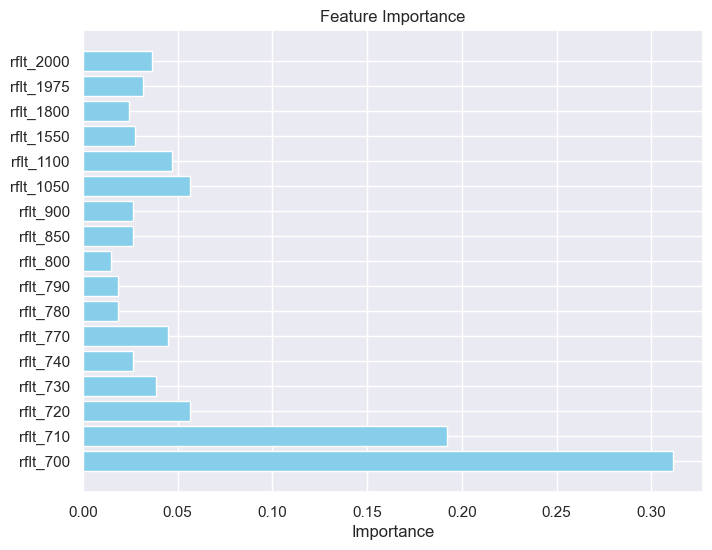

In [17]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
features = Selected_Features  # Replace with your feature names

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

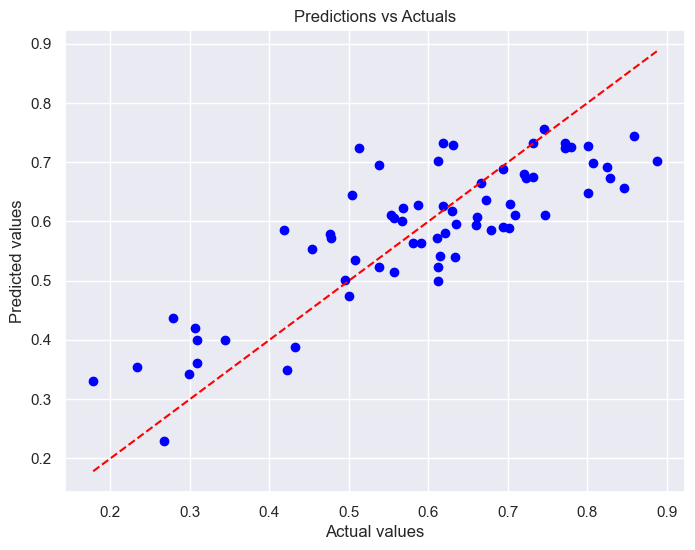

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line for perfect prediction
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predictions vs Actuals')
plt.show()

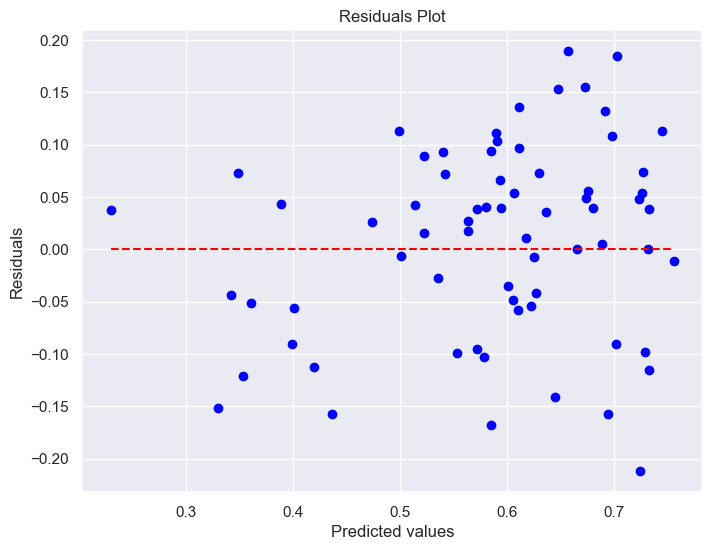

In [19]:
# Residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.hlines(0, xmin=min(y_pred), xmax=max(y_pred), colors='red', linestyles='--')  # Horizontal line at 0
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [32]:
Final_merged_df_HS_sub_clean.columns

Index(['rflt_700', 'rflt_710', 'rflt_720', 'rflt_730', 'rflt_740', 'rflt_770',
       'rflt_780', 'rflt_790', 'rflt_800', 'rflt_850', 'rflt_900', 'rflt_1050',
       'rflt_1100', 'rflt_1550', 'rflt_1800', 'rflt_1975', 'rflt_2000',
       'YieldGrain0PercKgM2', 'site'],
      dtype='object')

In [35]:
X_Features_CH=Final_merged_df_HS_sub_clean[Final_merged_df_HS_sub_clean['site']=='CH']
X_Features_CH_clean=X_Features_CH[Selected_Features].values
print(X_Features_CH)
print(X_Features_CH_clean)

     rflt_700  rflt_710  rflt_720  rflt_730  rflt_740  rflt_770  rflt_780  \
0    0.059242  0.105909  0.175623  0.286699  0.429009  0.640132  0.651862   
1    0.134834  0.169693  0.205430  0.241468  0.270126  0.302476  0.306683   
2    0.072774  0.124739  0.193750  0.288756  0.391579  0.516442  0.523570   
3    0.073408  0.116500  0.174001  0.254887  0.343721  0.451229  0.457561   
5    0.052974  0.099807  0.161836  0.255170  0.371476  0.533450  0.543391   
..        ...       ...       ...       ...       ...       ...       ...   
145  0.108000  0.158107  0.224169  0.315829  0.418545  0.519681  0.540312   
146  0.151128  0.200758  0.260441  0.333904  0.405201  0.493090  0.502224   
147  0.145182  0.191781  0.245702  0.308822  0.367665  0.440455  0.448840   
148  0.156507  0.207381  0.266863  0.336700  0.401375  0.477228  0.485035   
149  0.224869  0.274366  0.322705  0.369397  0.406211  0.450756  0.458040   

     rflt_790  rflt_800  rflt_850  rflt_900  rflt_1050  rflt_1100  rflt_155

In [36]:
Y_Variable_CH=X_Features_CH['YieldGrain0PercKgM2'].values
print(Y_Variable_CH)

[0.7083233  0.31991099 0.66530162 0.58637591 0.77160544 0.72292497
 0.62620464 0.27553737 0.73150793 0.63327302 0.48848665 0.74749187
 0.52466769 0.73263932 0.43111267 0.75889459 0.61214801 0.68128326
 0.72214119 0.55652422 0.29092675 0.7265751  0.54987965 0.63854233
 0.31719493 0.30862176 0.59526811 0.72658339 0.48731051 0.56812097
 0.6495765  0.33266101 0.42539013 0.69421183 0.26146313 0.60741118
 0.67952846 0.56860457 0.51962327 0.66102074 0.55434975 0.65448946
 0.80101782 0.63404199 0.66777178 0.6180411  0.50406126 0.59829402
 0.72399166 0.738942   0.6919956  0.58954949 0.65950658 0.62501596
 0.58351977 0.61450606 0.2577116  0.23297429 0.2583675  0.27836321
 0.65692622 0.61538604 0.56480309 0.69412305 0.54171635 0.60914164
 0.63813998 0.26510042 0.63830605 0.67182394 0.47417395 0.6748125
 0.53801634 0.5686831  0.58394401 0.55238066 0.47706034 0.30697011
 0.47042567 0.57201352 0.61727604 0.74611867 0.45390237 0.29545146
 0.50824705 0.52359442 0.51041056 0.63115219 0.49475741 0.33288

In [37]:
X_Features_GO=Final_merged_df_HS_sub_clean[Final_merged_df_HS_sub_clean['site']=='GO']
X_Features_GO_clean=X_Features_GO[Selected_Features].values
print(X_Features_GO)
print(X_Features_GO_clean)

     rflt_700  rflt_710  rflt_720  rflt_730  rflt_740  rflt_770  rflt_780  \
150  0.066947  0.134610  0.225933  0.357180  0.508808  0.710803  0.721828   
151  0.146641  0.213739  0.285015  0.362951  0.429800  0.501547  0.508120   
152  0.058750  0.119424  0.208670  0.353076  0.541953  0.835730  0.852706   
153  0.068793  0.127344  0.206404  0.324790  0.465246  0.662073  0.674742   
154  0.124089  0.206274  0.298025  0.400620  0.487953  0.579449  0.586888   
..        ...       ...       ...       ...       ...       ...       ...   
219  0.047218  0.099134  0.174936  0.294587  0.449450  0.694645  0.710290   
220  0.034204  0.074077  0.134901  0.234169  0.363327  0.560256  0.571960   
221  0.083700  0.139470  0.209133  0.295044  0.374653  0.462190  0.468986   
222  0.046770  0.101778  0.183443  0.311724  0.476750  0.737788  0.753112   
223  0.056492  0.117007  0.201605  0.325040  0.467541  0.655685  0.666188   

     rflt_790  rflt_800  rflt_850  rflt_900  rflt_1050  rflt_1100  rflt_155

In [38]:
Y_Variable_GO=X_Features_GO['YieldGrain0PercKgM2'].values
print(Y_Variable_GO)

[0.62069102 0.41433146 0.67667098 0.66845604 0.37547098 0.5567559
 0.69192997 0.69003978 0.80688067 0.73187174 0.67194441 0.45642445
 0.72814927 0.74411617 0.65382535 0.59769692 0.73545587 0.71171229
 0.46467985 0.61189624 0.73973765 0.71674311 0.66919363 0.73262521
 0.42203203 0.55717362 0.65435272 0.6107358  0.54233324 0.4614472
 0.59119843 0.33943349 0.77235269 0.52751675 0.59003844 0.8010788
 0.58443542 0.73523991 0.49712131 0.48844379 0.66649055 0.66779551
 0.70312304 0.56745423 0.63203699 0.74677629 0.73140309 0.59112025
 0.49968821 0.41842986 0.66571066 0.77959731 0.61253139 0.65512935
 0.35489019 0.57168624 0.56980481 0.35008968 0.63224735 0.53995037
 0.67936997 0.59121081 0.56675394 0.66291236 0.60125573 0.68062124
 0.45967457 0.63097614 0.733135   0.75984216 0.80264088 0.47637822
 0.77998346 0.61453345]


In [39]:
X_Features_RE=Final_merged_df_HS_sub_clean[Final_merged_df_HS_sub_clean['site']=='RE']
X_Features_RE_clean=X_Features_RE[Selected_Features].values
print(X_Features_RE)
print(X_Features_RE_clean)

     rflt_700  rflt_710  rflt_720  rflt_730  rflt_740  rflt_770  rflt_780  \
224  0.072485  0.144732  0.242154  0.381473  0.532128  0.701593  0.708796   
225  0.169309  0.275136  0.384727  0.502592  0.599083  0.689019  0.694662   
226  0.146023  0.202851  0.259353  0.316893  0.361679  0.407746  0.412913   
227  0.143867  0.205283  0.272141  0.349176  0.417655  0.488696  0.493701   
228  0.138743  0.180951  0.226335  0.277096  0.321478  0.371167  0.376318   
..        ...       ...       ...       ...       ...       ...       ...   
341  0.074042  0.126876  0.200360  0.311026  0.450229  0.676863  0.692912   
342  0.077875  0.142358  0.234362  0.378024  0.563757  0.871430  0.892288   
343  0.063623  0.121177  0.207642  0.348521  0.539583  0.878975  0.902156   
344  0.087946  0.147718  0.229362  0.347977  0.487174  0.687340  0.701247   
345  0.057213  0.103807  0.173976  0.291213  0.453120  0.739194  0.759175   

     rflt_790  rflt_800  rflt_850  rflt_900  rflt_1050  rflt_1100  rflt_155

In [40]:
Y_Variable_RE=X_Features_RE['YieldGrain0PercKgM2'].values
print(Y_Variable_RE)

[0.37850248 0.20842992 0.17823367 0.27887186 0.25444874 0.49247339
 0.46466383 0.51715121 0.41084662 0.41781143 0.38358676 0.30751583
 0.22964733 0.31023967 0.32096    0.51392606 0.550528   0.57411833
 0.63463644 0.347208   0.68627867 0.67567407 0.70539915 0.65182708
 0.69677089 0.59908    0.5709382  0.6069251  0.58300062 0.62029978
 0.60346216 0.60588    0.70474527 0.63136942 0.63952394 0.69045328
 0.66900673 0.63503842 0.61786787 0.5690797  0.67653483 0.60089333
 0.5335173  0.55227333 0.64610723 0.580594   0.51122199 0.62191343
 0.596921   0.66776649 0.63735975 0.6838548  0.56231467 0.4998
 0.49277006 0.4104125  0.4867525  0.48601739 0.51240134 0.50420029
 0.55368352 0.57088929 0.6685289  0.6245834  0.61145449 0.61853622
 0.5870554  0.53760183 0.456688   0.52312076 0.54763632 0.46547046
 0.61195814 0.85284961 0.84385714 0.91194239 0.84421647 0.70121212
 0.7200439  0.73099759 0.85470244 0.7835743  0.7932031  0.70887576
 0.80730909 0.64411086 0.80880306 0.84922088 0.7453122  0.76885714

In [42]:
# Split into training and test sets
X_train_CH, X_test_CH, y_train_CH, y_test_CH = train_test_split(X_Features_CH_clean, Y_Variable_CH, test_size=0.2, random_state=42)

print("X_train:\n", X_train_CH)
print(len(X_train_CH))
print("X_test:\n", X_test_CH)
print(len(X_test_CH))
print("y_train:", y_train_CH)
print(len(y_train_CH))
print("y_test:", y_test_CH)
print(len(y_test_CH))

X_train:
 [[0.154677 0.206258 0.263855 ... 0.286376 0.148429 0.151755]
 [0.073615 0.131982 0.20732  ... 0.156954 0.039852 0.092321]
 [0.165645 0.211294 0.263572 ... 0.319552 0.16193  0.168692]
 ...
 [0.134471 0.172867 0.215104 ... 0.205778 0.181293 0.068938]
 [0.112852 0.1587   0.217884 ... 0.221851 0.072707 0.086561]
 [0.091782 0.157831 0.246718 ... 0.207559 0.042474 0.037813]]
118
X_test:
 [[0.15958  0.219234 0.289103 0.374013 0.455436 0.552508 0.561586 0.569192
  0.576311 0.596422 0.605613 0.60562  0.619238 0.258091 0.290484 0.140127
  0.144537]
 [0.087118 0.130663 0.187969 0.263342 0.342998 0.438621 0.445052 0.44985
  0.45359  0.462259 0.461083 0.480438 0.491983 0.152503 0.120414 0.
  0.106632]
 [0.096861 0.17322  0.271769 0.406044 0.553791 0.750144 0.763027 0.772505
  0.780607 0.798873 0.801218 0.772999 0.783467 0.19608  0.251489 0.042156
  0.04431 ]
 [0.075028 0.10486  0.145161 0.198848 0.254592 0.323085 0.327918 0.332496
  0.334867 0.339784 0.343077 0.37454  0.384273 0.122017 0.

In [45]:
# Split into training and test sets
X_train_GO, X_test_GO, y_train_GO, y_test_GO = train_test_split(X_Features_GO_clean, Y_Variable_GO, test_size=0.2, random_state=42)

print("X_train:\n", X_train_GO)
print(len(X_train_GO))
print("X_test:\n", X_test_GO)
print(len(X_test_GO))
print("y_train:", y_train_GO)
print(len(y_train_GO))
print("y_test:", y_test_GO)
print(len(y_test_GO))

X_train:
 [[0.067861 0.135968 0.229684 ... 0.248725 0.031738 0.066449]
 [0.121553 0.169911 0.222959 ... 0.180323 0.05345  0.068567]
 [0.06084  0.130079 0.230319 ... 0.255894 0.005487 0.053064]
 ...
 [0.0837   0.13947  0.209133 ... 0.174083 0.044451 0.050902]
 [0.045982 0.094487 0.164652 ... 0.090492 0.000762 0.016306]
 [0.028794 0.060153 0.106867 ... 0.153899 0.029029 0.022366]]
59
X_test:
 [[0.124089 0.206274 0.298025 0.40062  0.487953 0.579449 0.586888 0.592736
  0.600548 0.620244 0.628737 0.578217 0.586916 0.190098 0.243439 0.057423
  0.071745]
 [0.061377 0.127056 0.224876 0.381548 0.583967 0.900337 0.918316 0.929625
  0.939002 0.958008 0.958491 0.987626 0.998643 0.222585 0.292556 0.018094
  0.047946]
 [0.099966 0.172788 0.258063 0.359606 0.45208  0.553324 0.561665 0.567456
  0.574376 0.591438 0.59716  0.595508 0.603521 0.174061 0.20698  0.035703
  0.072966]
 [0.066947 0.13461  0.225933 0.35718  0.508808 0.710803 0.721828 0.728281
  0.73416  0.748447 0.750495 0.713594 0.724834 0.163

In [46]:
# Split into training and test sets
X_train_RE, X_test_RE, y_train_RE, y_test_RE = train_test_split(X_Features_RE_clean, Y_Variable_RE, test_size=0.2, random_state=42)

print("X_train:\n", X_train_RE)
print(len(X_train_RE))
print("X_test:\n", X_test_RE)
print(len(X_test_RE))
print("y_train:", y_train_RE)
print(len(y_train_RE))
print("y_test:", y_test_RE)
print(len(y_test_RE))

X_train:
 [[0.098242 0.171216 0.263348 ... 0.204967 0.028481 0.026771]
 [0.093184 0.140241 0.211997 ... 0.278194 0.04113  0.097738]
 [0.075912 0.125787 0.203394 ... 0.253135 0.037881 0.018706]
 ...
 [0.078521 0.138657 0.222437 ... 0.225266 0.019061 0.041379]
 [0.055884 0.116677 0.206134 ... 0.191615 0.027591 0.032638]
 [0.050945 0.094208 0.155273 ... 0.115112 0.021589 0.032498]]
97
X_test:
 [[7.75050e-02 1.35177e-01 2.09957e-01 3.16750e-01 4.38784e-01 6.00599e-01
  6.10711e-01 6.17670e-01 6.24405e-01 6.41028e-01 6.45619e-01 6.16689e-01
  6.24207e-01 1.27729e-01 1.63538e-01 4.17750e-02 1.85360e-02]
 [8.19870e-02 1.62100e-01 2.66168e-01 4.09689e-01 5.63112e-01 7.42116e-01
  7.52325e-01 7.58742e-01 7.65489e-01 7.82792e-01 7.85567e-01 7.41094e-01
  7.50158e-01 1.68286e-01 2.25867e-01 4.64810e-02 4.16300e-02]
 [6.34620e-02 1.36376e-01 2.43438e-01 4.14037e-01 6.27944e-01 9.28783e-01
  9.43832e-01 9.52669e-01 9.61493e-01 9.79785e-01 9.85067e-01 9.16709e-01
  9.22914e-01 1.65932e-01 2.22116e-0

In [47]:
X_train = np.concatenate((X_train_CH, X_train_GO,X_train_RE), axis=0)
y_train = np.concatenate((y_train_CH, y_train_GO,y_train_RE), axis=0)
X_test = np.concatenate((X_test_CH, X_test_GO,X_test_RE), axis=0)
X_test = np.concatenate((X_test_CH, X_test_GO,X_test_RE), axis=0)
y_test = np.concatenate((y_test_CH, y_test_GO,y_test_RE), axis=0)


In [48]:
# 1. Create classifier
# 2. Extract Features
# 3. fit the model

# 1. Create classifier
clf = ensemble.RandomForestRegressor(max_depth=7, n_estimators=100, n_jobs=-1,verbose=2)

# 2. fit the model
t1 = timer()
clf.fit(X_train, y_train)
t2 = timer()
print ('training time: %.1fs'%(t2-t1))

# 3. evaluate accuracy on train and test datasets
print("training score : %.3f" % (clf.score(X_train, y_train)))
print("test score : %.3f" % (clf.score(X_test, y_test)))


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  88 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  88 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    0.0s finished


In [147]:
# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model: R-squared for training and test sets
train_r2 = model.score(X_train, y_train)  # R-squared for training data
test_r2 = model.score(X_test, y_test)     # R-squared for test data

# Print R-squared scores for both training and test sets
print("Training R-squared: %.3f" % train_r2)
print("Test R-squared: %.3f" % test_r2)

# Calculate and print Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Training R-squared: 0.952
Test R-squared: 0.671
Mean Squared Error: 0.007642876316777366


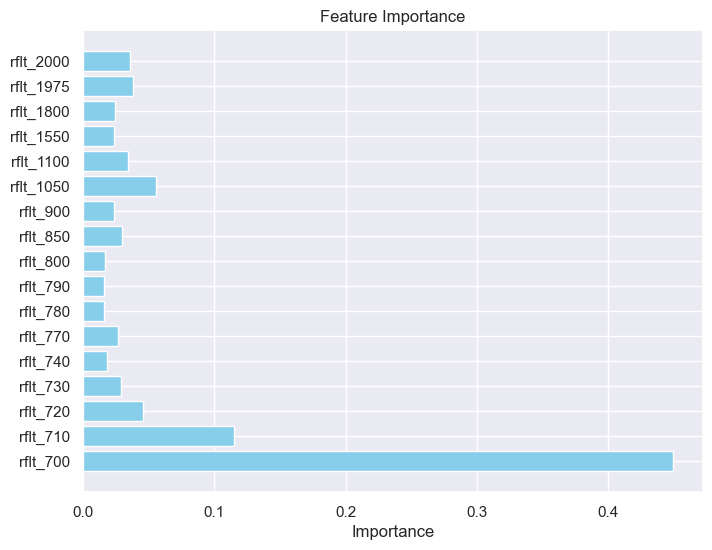

In [50]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
features = Selected_Features  # Replace with your feature names

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

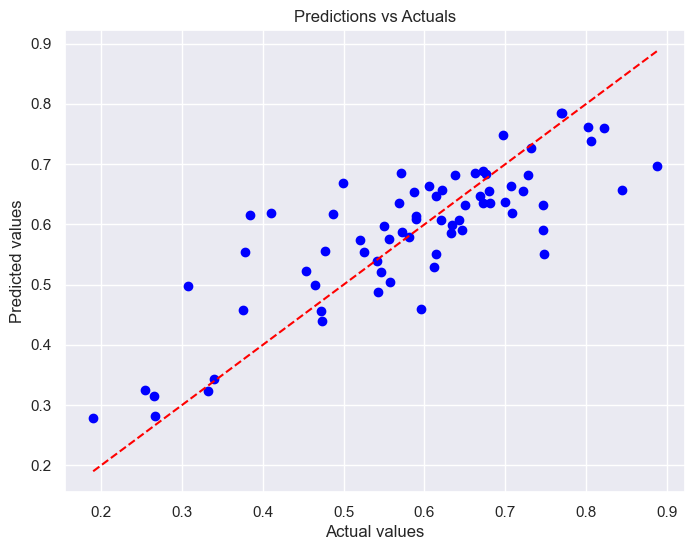

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line for perfect prediction
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predictions vs Actuals')
plt.show()

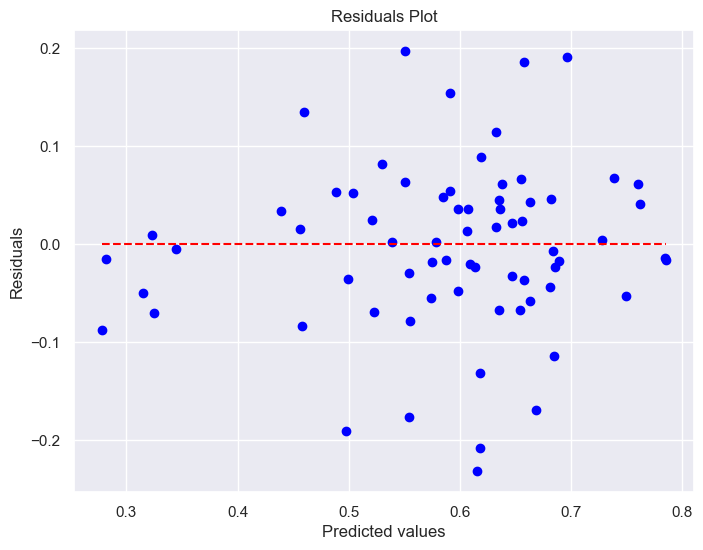

In [52]:
# Residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.hlines(0, xmin=min(y_pred), xmax=max(y_pred), colors='red', linestyles='--')  # Horizontal line at 0
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [107]:
X_Features_2021=Final_merged_df_HS_sub_clean[Final_merged_df_HS_sub_clean['Year']==2021]
X_Features_2021_clean=X_Features_2021[Selected_Features].values
print(X_Features_2021)
print(X_Features_2021_clean)

     rflt_700  rflt_710  rflt_720  rflt_730  rflt_740  rflt_770  rflt_780  \
0    0.059242  0.105909  0.175623  0.286699  0.429009  0.640132  0.651862   
1    0.134834  0.169693  0.205430  0.241468  0.270126  0.302476  0.306683   
2    0.072774  0.124739  0.193750  0.288756  0.391579  0.516442  0.523570   
3    0.073408  0.116500  0.174001  0.254887  0.343721  0.451229  0.457561   
5    0.052974  0.099807  0.161836  0.255170  0.371476  0.533450  0.543391   
..        ...       ...       ...       ...       ...       ...       ...   
291  0.054258  0.112170  0.195790  0.326226  0.485121  0.701200  0.713559   
292  0.083672  0.155651  0.251347  0.387839  0.538331  0.721970  0.732975   
293  0.074592  0.140171  0.229267  0.360206  0.511986  0.709563  0.719731   
294  0.081667  0.157522  0.256478  0.392600  0.536369  0.705389  0.715139   
295  0.058353  0.113903  0.189615  0.299890  0.423805  0.578557  0.586947   

     rflt_790  rflt_800  rflt_850  rflt_900  rflt_1050  rflt_1100  rflt_155

In [108]:
Y_Variable_2021=X_Features_2021['YieldGrain0PercKgM2'].values
print(Y_Variable_2021)
print(len(Y_Variable_2021))

[0.7083233  0.31991099 0.66530162 0.58637591 0.77160544 0.72292497
 0.62620464 0.27553737 0.73150793 0.63327302 0.48848665 0.74749187
 0.52466769 0.73263932 0.43111267 0.75889459 0.61214801 0.68128326
 0.72214119 0.55652422 0.29092675 0.7265751  0.54987965 0.63854233
 0.31719493 0.30862176 0.59526811 0.72658339 0.48731051 0.56812097
 0.6495765  0.33266101 0.42539013 0.69421183 0.26146313 0.60741118
 0.67952846 0.56860457 0.51962327 0.66102074 0.55434975 0.65448946
 0.80101782 0.63404199 0.66777178 0.6180411  0.50406126 0.59829402
 0.72399166 0.738942   0.6919956  0.58954949 0.65950658 0.62501596
 0.58351977 0.61450606 0.2577116  0.23297429 0.2583675  0.27836321
 0.65692622 0.61538604 0.56480309 0.69412305 0.54171635 0.60914164
 0.63813998 0.26510042 0.63830605 0.67182394 0.47417395 0.6748125
 0.53801634 0.62069102 0.41433146 0.67667098 0.66845604 0.37547098
 0.5567559  0.69192997 0.69003978 0.80688067 0.73187174 0.67194441
 0.45642445 0.72814927 0.74411617 0.65382535 0.59769692 0.73545

In [109]:
X_Features_2022=Final_merged_df_HS_sub_clean[Final_merged_df_HS_sub_clean['Year']==2022]
X_Features_2022_clean=X_Features_2022[Selected_Features].values
print(X_Features_2022)
print(X_Features_2022_clean)

     rflt_700  rflt_710  rflt_720  rflt_730  rflt_740  rflt_770  rflt_780  \
75   0.094026  0.177769  0.292959  0.459029  0.650358  0.912066  0.928250   
76   0.070467  0.126175  0.210373  0.344649  0.515363  0.774629  0.791785   
77   0.089864  0.171373  0.284058  0.447889  0.640396  0.910839  0.927653   
78   0.088174  0.153067  0.239468  0.357311  0.480994  0.633488  0.644406   
79   0.170415  0.232422  0.301642  0.378172  0.442637  0.517504  0.526485   
..        ...       ...       ...       ...       ...       ...       ...   
341  0.074042  0.126876  0.200360  0.311026  0.450229  0.676863  0.692912   
342  0.077875  0.142358  0.234362  0.378024  0.563757  0.871430  0.892288   
343  0.063623  0.121177  0.207642  0.348521  0.539583  0.878975  0.902156   
344  0.087946  0.147718  0.229362  0.347977  0.487174  0.687340  0.701247   
345  0.057213  0.103807  0.173976  0.291213  0.453120  0.739194  0.759175   

     rflt_790  rflt_800  rflt_850  rflt_900  rflt_1050  rflt_1100  rflt_155

In [110]:
Y_Variable_2022=X_Features_2022['YieldGrain0PercKgM2'].values
print(Y_Variable_2022)

[0.5686831  0.58394401 0.55238066 0.47706034 0.30697011 0.47042567
 0.57201352 0.61727604 0.74611867 0.45390237 0.29545146 0.50824705
 0.52359442 0.51041056 0.63115219 0.49475741 0.33288238 0.3444723
 0.67079942 0.55285866 0.72459277 0.62088412 0.83284452 0.70654622
 0.39799862 0.64465392 0.53251857 0.56760913 0.62910638 0.63745196
 0.46765821 0.70864272 0.54599891 0.34125142 0.45574832 0.30503116
 0.30916808 0.29826514 0.61287896 0.5945006  0.66037233 0.50009413
 0.5238278  0.26771153 0.69886232 0.61170475 0.43173232 0.46150753
 0.51328354 0.67651191 0.44885106 0.2670376  0.47279817 0.24306294
 0.6622207  0.60386228 0.44440259 0.65132935 0.19021305 0.24460604
 0.58574298 0.45221181 0.64256313 0.46511953 0.49453122 0.60742962
 0.5197051  0.55857347 0.44481131 0.58901768 0.63335218 0.47235724
 0.44801638 0.44383979 0.28169524 0.61195814 0.85284961 0.84385714
 0.91194239 0.84421647 0.70121212 0.7200439  0.73099759 0.85470244
 0.7835743  0.7932031  0.70887576 0.80730909 0.64411086 0.80880

In [111]:
# Split into training and test sets
X_train_2021, X_test_2021, y_train_2021, y_test_2021 = train_test_split(X_Features_2021_clean, Y_Variable_2021, test_size=0.2, random_state=42)

print("X_train:\n", X_train_2021)
print(len(X_train_2021))
print("X_test:\n", X_test_2021)
print(len(X_test_2021))
print("y_train:", y_train_2021)
print(len(y_train_2021))
print("y_test:", y_test_2021)
print(len(y_test_2021))

X_train:
 [[0.065411 0.136865 0.237204 ... 0.288408 0.042397 0.050982]
 [0.105833 0.17977  0.264973 ... 0.190874 0.049257 0.035738]
 [0.078852 0.147217 0.240716 ... 0.205372 0.025501 0.040847]
 ...
 [0.046841 0.091826 0.153931 ... 0.133486 0.037549 0.016038]
 [0.048296 0.100184 0.179461 ... 0.178184 0.012282 0.012455]
 [0.146324 0.182103 0.219398 ... 0.285741 0.153454 0.161246]]
175
X_test:
 [[0.062242 0.122268 0.206788 0.335755 0.490088 0.700944 0.712693 0.720707
  0.728022 0.743627 0.745321 0.69912  0.712557 0.136419 0.201324 0.011276
  0.023082]
 [0.056247 0.123497 0.22218  0.372755 0.558322 0.831413 0.846747 0.856818
  0.865167 0.882902 0.889784 0.768882 0.782115 0.14129  0.206911 0.058498
  0.022815]
 [0.074592 0.140171 0.229267 0.360206 0.511986 0.709563 0.719731 0.726748
  0.733374 0.749524 0.75202  0.711436 0.72254  0.143532 0.196439 0.03273
  0.013645]
 [0.081667 0.157522 0.256478 0.3926   0.536369 0.705389 0.715139 0.721894
  0.729204 0.746502 0.750505 0.720605 0.732478 0.158

In [112]:
# Split into training and test sets
X_train_2022, X_test_2022, y_train_2022, y_test_2022 = train_test_split(X_Features_2022_clean, Y_Variable_2022, test_size=0.2, random_state=42)

print("X_train:\n", X_train_2022)
print(len(X_train_2022))
print("X_test:\n", X_test_2022)
print(len(X_test_2022))
print("y_train:", y_train_2022)
print(len(y_train_2022))
print("y_test:", y_test_2022)
print(len(y_test_2022))

X_train:
 [[0.109475 0.182429 0.27068  ... 0.250454 0.04372  0.058316]
 [0.102432 0.171833 0.260005 ... 0.202061 0.034127 0.043162]
 [0.176938 0.221048 0.27098  ... 0.31397  0.176551 0.19118 ]
 ...
 [0.06891  0.120035 0.192455 ... 0.200891 0.037065 0.039146]
 [0.249046 0.291328 0.333041 ... 0.416038 0.280392 0.299914]
 [0.047328 0.080823 0.129629 ... 0.159759 0.031074 0.027625]]
100
X_test:
 [[0.085043 0.131788 0.196436 0.290593 0.40311  0.568561 0.58083  0.589887
  0.597779 0.616489 0.622564 0.609238 0.620161 0.147374 0.194595 0.045979
  0.047363]
 [0.128269 0.179572 0.243305 0.326663 0.411683 0.521078 0.531549 0.540537
  0.54855  0.571227 0.579313 0.558848 0.571263 0.197158 0.235125 0.103513
  0.103416]
 [0.202656 0.251074 0.301936 0.35354  0.39502  0.442685 0.449093 0.455416
  0.460923 0.478304 0.489751 0.513569 0.52565  0.29291  0.330545 0.174686
  0.187346]
 [0.068665 0.122266 0.201517 0.330291 0.504535 0.809425 0.831383 0.845732
  0.857888 0.88708  0.890631 0.841838 0.860291 0.13

In [148]:
X_train = np.concatenate((X_train_2021, X_train_2022), axis=0)
y_train = np.concatenate((y_train_2021, y_train_2022), axis=0)
X_test = np.concatenate((X_test_2021, X_test_2022), axis=0)
y_test = np.concatenate((y_test_2021, y_test_2022), axis=0)


In [114]:
# 1. Create classifier
# 2. Extract Features
# 3. fit the model

# 1. Create classifier
clf = ensemble.RandomForestRegressor(max_depth=7, n_estimators=100, n_jobs=-1,verbose=2)

# 2. fit the model
t1 = timer()
clf.fit(X_train, y_train)
t2 = timer()
print ('training time: %.1fs'%(t2-t1))

# 3. evaluate accuracy on train and test datasets
print("training score : %.3f" % (clf.score(X_train, y_train)))
print("test score : %.3f" % (clf.score(X_test, y_test)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  88 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  88 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    0.0s finished


In [165]:
# 1. Create classifier
# 2. Extract Features
# 3. fit the model

# 1. Create classifier
clf = ensemble.RandomForestRegressor(max_depth=10, n_estimators=200, n_jobs=-1,verbose=2)

# 2. fit the model
t1 = timer()
clf.fit(X_train, y_train)
t2 = timer()
print ('training time: %.1fs'%(t2-t1))

# 3. evaluate accuracy on train and test datasets
print("training score : %.3f" % (clf.score(X_train, y_train)))
print("test score : %.3f" % (clf.score(X_test, y_test)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    0.3s


training time: 0.8s
training score : 0.948
test score : 0.720


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 200 out of 200 | elapsed:    0.0s finished


In [166]:
# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=200,max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model: R-squared for training and test sets
train_r2 = model.score(X_train, y_train)  # R-squared for training data
test_r2 = model.score(X_test, y_test)     # R-squared for test data

# Print R-squared scores for both training and test sets
print("Training R-squared: %.3f" % train_r2)
print("Test R-squared: %.3f" % test_r2)

# Calculate and print Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Training R-squared: 0.947
Test R-squared: 0.718
Mean Squared Error: 0.007038305673188606


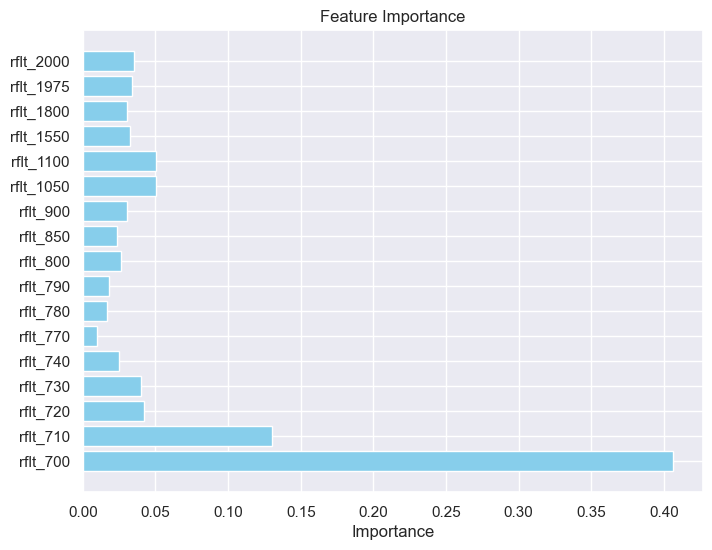

In [116]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
features = Selected_Features  # Replace with your feature names

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

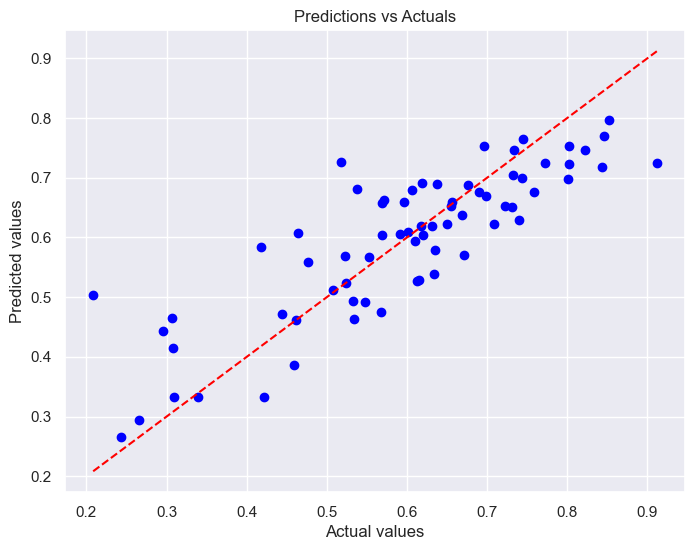

In [117]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line for perfect prediction
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predictions vs Actuals')
plt.show()

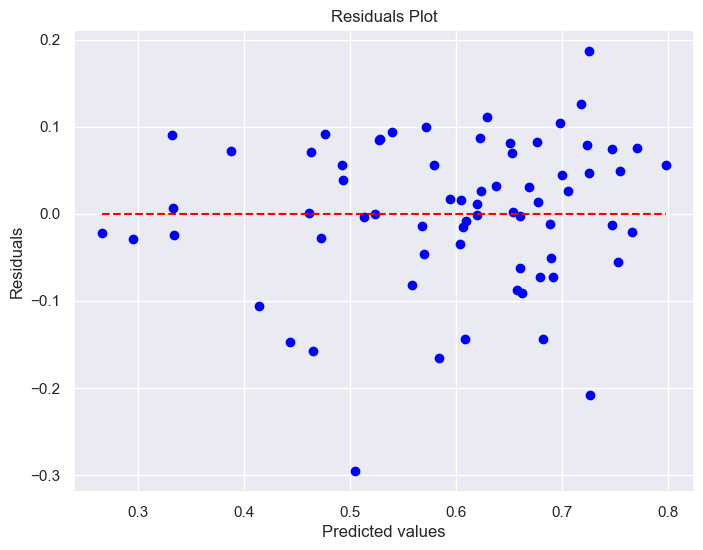

In [118]:
# Residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.hlines(0, xmin=min(y_pred), xmax=max(y_pred), colors='red', linestyles='--')  # Horizontal line at 0
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [95]:
Site_Filter

0      True
1      True
2      True
3      True
5      True
       ... 
341    True
342    True
343    True
344    True
345    True
Name: site, Length: 344, dtype: bool

In [96]:
Year_Filter

0      True
1      True
2      True
3      True
5      True
       ... 
341    True
342    True
343    True
344    True
345    True
Name: Year, Length: 344, dtype: bool

In [120]:
Site_Filter= Final_merged_df_HS_sub_clean['site']== 'CH'
Year_Filter= Final_merged_df_HS_sub_clean['Year']== 2021

X_Features_2021_CH=Final_merged_df_HS_sub_clean[Site_Filter & Year_Filter]
X_Features_2021_CH_clean=X_Features_2021_CH[Selected_Features].values
print(X_Features_2021_CH)
print(X_Features_2021_CH_clean)

    rflt_700  rflt_710  rflt_720  rflt_730  rflt_740  rflt_770  rflt_780  \
0   0.059242  0.105909  0.175623  0.286699  0.429009  0.640132  0.651862   
1   0.134834  0.169693  0.205430  0.241468  0.270126  0.302476  0.306683   
2   0.072774  0.124739  0.193750  0.288756  0.391579  0.516442  0.523570   
3   0.073408  0.116500  0.174001  0.254887  0.343721  0.451229  0.457561   
5   0.052974  0.099807  0.161836  0.255170  0.371476  0.533450  0.543391   
..       ...       ...       ...       ...       ...       ...       ...   
70  0.099627  0.145898  0.206868  0.289321  0.378521  0.493532  0.500955   
71  0.060796  0.098814  0.155282  0.240103  0.344491  0.500051  0.509592   
72  0.132757  0.182243  0.242183  0.310133  0.371756  0.442729  0.449056   
73  0.110389  0.144902  0.190469  0.244603  0.298057  0.370069  0.375980   
74  0.153069  0.235428  0.335097  0.467724  0.604483  0.752098  0.761393   

    rflt_790  rflt_800  rflt_850  rflt_900  rflt_1050  rflt_1100  rflt_1550  \
0   0.66

In [121]:
Y_Variable_2021_CH=X_Features_2021_CH['YieldGrain0PercKgM2'].values
print(Y_Variable_2021_CH)
print(len(Y_Variable_2021_CH))

[0.7083233  0.31991099 0.66530162 0.58637591 0.77160544 0.72292497
 0.62620464 0.27553737 0.73150793 0.63327302 0.48848665 0.74749187
 0.52466769 0.73263932 0.43111267 0.75889459 0.61214801 0.68128326
 0.72214119 0.55652422 0.29092675 0.7265751  0.54987965 0.63854233
 0.31719493 0.30862176 0.59526811 0.72658339 0.48731051 0.56812097
 0.6495765  0.33266101 0.42539013 0.69421183 0.26146313 0.60741118
 0.67952846 0.56860457 0.51962327 0.66102074 0.55434975 0.65448946
 0.80101782 0.63404199 0.66777178 0.6180411  0.50406126 0.59829402
 0.72399166 0.738942   0.6919956  0.58954949 0.65950658 0.62501596
 0.58351977 0.61450606 0.2577116  0.23297429 0.2583675  0.27836321
 0.65692622 0.61538604 0.56480309 0.69412305 0.54171635 0.60914164
 0.63813998 0.26510042 0.63830605 0.67182394 0.47417395 0.6748125
 0.53801634]
73


In [122]:
Site_Filter= Final_merged_df_HS_sub_clean['site']== 'CH'
Year_Filter= Final_merged_df_HS_sub_clean['Year']== 2022

X_Features_2022_CH=Final_merged_df_HS_sub_clean[Site_Filter & Year_Filter]
X_Features_2022_CH_clean=X_Features_2022_CH[Selected_Features].values
print(X_Features_2022_CH)
print(X_Features_2022_CH_clean)

     rflt_700  rflt_710  rflt_720  rflt_730  rflt_740  rflt_770  rflt_780  \
75   0.094026  0.177769  0.292959  0.459029  0.650358  0.912066  0.928250   
76   0.070467  0.126175  0.210373  0.344649  0.515363  0.774629  0.791785   
77   0.089864  0.171373  0.284058  0.447889  0.640396  0.910839  0.927653   
78   0.088174  0.153067  0.239468  0.357311  0.480994  0.633488  0.644406   
79   0.170415  0.232422  0.301642  0.378172  0.442637  0.517504  0.526485   
..        ...       ...       ...       ...       ...       ...       ...   
145  0.108000  0.158107  0.224169  0.315829  0.418545  0.519681  0.540312   
146  0.151128  0.200758  0.260441  0.333904  0.405201  0.493090  0.502224   
147  0.145182  0.191781  0.245702  0.308822  0.367665  0.440455  0.448840   
148  0.156507  0.207381  0.266863  0.336700  0.401375  0.477228  0.485035   
149  0.224869  0.274366  0.322705  0.369397  0.406211  0.450756  0.458040   

     rflt_790  rflt_800  rflt_850  rflt_900  rflt_1050  rflt_1100  rflt_155

In [123]:
Y_Variable_2022_CH=X_Features_2022_CH['YieldGrain0PercKgM2'].values
print(Y_Variable_2022_CH)
print(len(Y_Variable_2022_CH))

[0.5686831  0.58394401 0.55238066 0.47706034 0.30697011 0.47042567
 0.57201352 0.61727604 0.74611867 0.45390237 0.29545146 0.50824705
 0.52359442 0.51041056 0.63115219 0.49475741 0.33288238 0.3444723
 0.67079942 0.55285866 0.72459277 0.62088412 0.83284452 0.70654622
 0.39799862 0.64465392 0.53251857 0.56760913 0.62910638 0.63745196
 0.46765821 0.70864272 0.54599891 0.34125142 0.45574832 0.30503116
 0.30916808 0.29826514 0.61287896 0.5945006  0.66037233 0.50009413
 0.5238278  0.26771153 0.69886232 0.61170475 0.43173232 0.46150753
 0.51328354 0.67651191 0.44885106 0.2670376  0.47279817 0.24306294
 0.6622207  0.60386228 0.44440259 0.65132935 0.19021305 0.24460604
 0.58574298 0.45221181 0.64256313 0.46511953 0.49453122 0.60742962
 0.5197051  0.55857347 0.44481131 0.58901768 0.63335218 0.47235724
 0.44801638 0.44383979 0.28169524]
75


In [124]:
Site_Filter= Final_merged_df_HS_sub_clean['site']== 'GO'
Year_Filter= Final_merged_df_HS_sub_clean['Year']== 2021

X_Features_2021_GO=Final_merged_df_HS_sub_clean[Site_Filter & Year_Filter]
X_Features_2021_GO_clean=X_Features_2021_GO[Selected_Features].values
print(X_Features_2021_GO)
print(X_Features_2021_GO_clean)

     rflt_700  rflt_710  rflt_720  rflt_730  rflt_740  rflt_770  rflt_780  \
150  0.066947  0.134610  0.225933  0.357180  0.508808  0.710803  0.721828   
151  0.146641  0.213739  0.285015  0.362951  0.429800  0.501547  0.508120   
152  0.058750  0.119424  0.208670  0.353076  0.541953  0.835730  0.852706   
153  0.068793  0.127344  0.206404  0.324790  0.465246  0.662073  0.674742   
154  0.124089  0.206274  0.298025  0.400620  0.487953  0.579449  0.586888   
..        ...       ...       ...       ...       ...       ...       ...   
219  0.047218  0.099134  0.174936  0.294587  0.449450  0.694645  0.710290   
220  0.034204  0.074077  0.134901  0.234169  0.363327  0.560256  0.571960   
221  0.083700  0.139470  0.209133  0.295044  0.374653  0.462190  0.468986   
222  0.046770  0.101778  0.183443  0.311724  0.476750  0.737788  0.753112   
223  0.056492  0.117007  0.201605  0.325040  0.467541  0.655685  0.666188   

     rflt_790  rflt_800  rflt_850  rflt_900  rflt_1050  rflt_1100  rflt_155

In [125]:
Y_Variable_2021_GO=X_Features_2021_GO['YieldGrain0PercKgM2'].values
print(Y_Variable_2021_GO)
print(len(Y_Variable_2021_GO))

[0.62069102 0.41433146 0.67667098 0.66845604 0.37547098 0.5567559
 0.69192997 0.69003978 0.80688067 0.73187174 0.67194441 0.45642445
 0.72814927 0.74411617 0.65382535 0.59769692 0.73545587 0.71171229
 0.46467985 0.61189624 0.73973765 0.71674311 0.66919363 0.73262521
 0.42203203 0.55717362 0.65435272 0.6107358  0.54233324 0.4614472
 0.59119843 0.33943349 0.77235269 0.52751675 0.59003844 0.8010788
 0.58443542 0.73523991 0.49712131 0.48844379 0.66649055 0.66779551
 0.70312304 0.56745423 0.63203699 0.74677629 0.73140309 0.59112025
 0.49968821 0.41842986 0.66571066 0.77959731 0.61253139 0.65512935
 0.35489019 0.57168624 0.56980481 0.35008968 0.63224735 0.53995037
 0.67936997 0.59121081 0.56675394 0.66291236 0.60125573 0.68062124
 0.45967457 0.63097614 0.733135   0.75984216 0.80264088 0.47637822
 0.77998346 0.61453345]
74


In [129]:
Site_Filter= Final_merged_df_HS_sub_clean['site']== 'RE'
Year_Filter= Final_merged_df_HS_sub_clean['Year']== 2021

X_Features_2021_RE=Final_merged_df_HS_sub_clean[Site_Filter & Year_Filter]
X_Features_2021_RE_clean=X_Features_2021_RE[Selected_Features].values
print(X_Features_2021_RE)
print(X_Features_2021_RE_clean)

     rflt_700  rflt_710  rflt_720  rflt_730  rflt_740  rflt_770  rflt_780  \
224  0.072485  0.144732  0.242154  0.381473  0.532128  0.701593  0.708796   
225  0.169309  0.275136  0.384727  0.502592  0.599083  0.689019  0.694662   
226  0.146023  0.202851  0.259353  0.316893  0.361679  0.407746  0.412913   
227  0.143867  0.205283  0.272141  0.349176  0.417655  0.488696  0.493701   
228  0.138743  0.180951  0.226335  0.277096  0.321478  0.371167  0.376318   
..        ...       ...       ...       ...       ...       ...       ...   
291  0.054258  0.112170  0.195790  0.326226  0.485121  0.701200  0.713559   
292  0.083672  0.155651  0.251347  0.387839  0.538331  0.721970  0.732975   
293  0.074592  0.140171  0.229267  0.360206  0.511986  0.709563  0.719731   
294  0.081667  0.157522  0.256478  0.392600  0.536369  0.705389  0.715139   
295  0.058353  0.113903  0.189615  0.299890  0.423805  0.578557  0.586947   

     rflt_790  rflt_800  rflt_850  rflt_900  rflt_1050  rflt_1100  rflt_155

In [130]:
Y_Variable_2021_RE=X_Features_2021_RE['YieldGrain0PercKgM2'].values
print(Y_Variable_2021_RE)
print(len(Y_Variable_2021_RE))

[0.37850248 0.20842992 0.17823367 0.27887186 0.25444874 0.49247339
 0.46466383 0.51715121 0.41084662 0.41781143 0.38358676 0.30751583
 0.22964733 0.31023967 0.32096    0.51392606 0.550528   0.57411833
 0.63463644 0.347208   0.68627867 0.67567407 0.70539915 0.65182708
 0.69677089 0.59908    0.5709382  0.6069251  0.58300062 0.62029978
 0.60346216 0.60588    0.70474527 0.63136942 0.63952394 0.69045328
 0.66900673 0.63503842 0.61786787 0.5690797  0.67653483 0.60089333
 0.5335173  0.55227333 0.64610723 0.580594   0.51122199 0.62191343
 0.596921   0.66776649 0.63735975 0.6838548  0.56231467 0.4998
 0.49277006 0.4104125  0.4867525  0.48601739 0.51240134 0.50420029
 0.55368352 0.57088929 0.6685289  0.6245834  0.61145449 0.61853622
 0.5870554  0.53760183 0.456688   0.52312076 0.54763632 0.46547046]
72


In [133]:
Site_Filter= Final_merged_df_HS_sub_clean['site']== 'RE'
Year_Filter= Final_merged_df_HS_sub_clean['Year']== 2022

X_Features_2022_RE=Final_merged_df_HS_sub_clean[Site_Filter & Year_Filter]
X_Features_2022_RE_clean=X_Features_2022_RE[Selected_Features].values
print(X_Features_2022_RE)
print(len(X_Features_2022_RE_clean))

     rflt_700  rflt_710  rflt_720  rflt_730  rflt_740  rflt_770  rflt_780  \
296  0.098858  0.170954  0.265858  0.402756  0.558278  0.766219  0.781292   
297  0.068665  0.122266  0.201517  0.330291  0.504535  0.809425  0.831383   
298  0.082914  0.140270  0.225286  0.359650  0.534847  0.837286  0.858433   
299  0.083267  0.142356  0.228209  0.362106  0.540417  0.879126  0.903566   
300  0.090129  0.150018  0.241094  0.384316  0.568878  0.884903  0.905756   
301  0.101788  0.172450  0.273561  0.417755  0.580860  0.814075  0.828293   
302  0.085352  0.140150  0.216421  0.330239  0.467400  0.667446  0.681257   
303  0.081150  0.145649  0.235965  0.376683  0.558900  0.857131  0.878157   
304  0.059140  0.107146  0.175587  0.280241  0.418118  0.665402  0.683461   
305  0.071964  0.133276  0.223731  0.369748  0.562733  0.881721  0.903529   
306  0.094967  0.159499  0.249371  0.386412  0.563666  0.869818  0.891548   
307  0.075919  0.134879  0.215339  0.335790  0.489468  0.756398  0.775990   

In [132]:
Y_Variable_2022_RE=X_Features_2022_RE['YieldGrain0PercKgM2'].values
print(Y_Variable_2022_RE)
print(len(Y_Variable_2022_RE))

[0.61195814 0.85284961 0.84385714 0.91194239 0.84421647 0.70121212
 0.7200439  0.73099759 0.85470244 0.7835743  0.7932031  0.70887576
 0.80730909 0.64411086 0.80880306 0.84922088 0.7453122  0.76885714
 0.80282791 0.81126202 0.69227294 0.84592713 0.8107873  0.77944715
 0.70257778 0.84646504 0.82194286 0.85838636 0.81724961 0.69567041
 0.8313303  0.82422439 0.80652874 0.85426667 0.72372414 0.88742169
 0.86980171 0.69951667 0.84406504 0.77209091 0.67418315 0.80225618
 0.82789778 0.77046667 0.65488193 0.77908015 0.76657778 0.80660465
 0.6568062  0.79706512]
50


In [134]:
# Split into training and test sets
X_train_2021_CH, X_test_2021_CH, y_train_2021_CH, y_test_2021_CH = train_test_split(X_Features_2021_CH_clean, Y_Variable_2021_CH, test_size=0.2, random_state=42)

print("X_train:\n", X_train_2021_CH)
print(len(X_train_2021_CH))
print("X_test:\n", X_test_2021_CH)
print(len(X_test_2021_CH))
print("y_train:", y_train_2021_CH)
print(len(y_train_2021_CH))
print("y_test:", y_test_2021_CH)
print(len(y_test_2021_CH))

X_train:
 [[0.070399 0.109161 0.162112 0.237133 0.320868 0.425167 0.43085  0.435522
  0.437308 0.44044  0.438974 0.479304 0.482007 0.129578 0.203606 0.061495
  0.04201 ]
 [0.137776 0.168009 0.198601 0.226309 0.245804 0.271101 0.274974 0.278942
  0.281514 0.29048  0.296954 0.327262 0.339966 0.186056 0.337567 0.134119
  0.      ]
 [0.083552 0.11695  0.161716 0.221242 0.286529 0.371905 0.377376 0.382679
  0.386018 0.393884 0.396785 0.414954 0.408365 0.112622 0.131392 0.
  0.      ]
 [0.052815 0.095614 0.15749  0.259916 0.399837 0.618501 0.631464 0.637606
  0.644119 0.654205 0.645714 0.615855 0.62482  0.103207 0.131535 0.021804
  0.194143]
 [0.077714 0.125131 0.186726 0.271606 0.365477 0.487135 0.493794 0.499732
  0.50287  0.509967 0.510851 0.548213 0.559945 0.154434 0.297699 0.267248
  0.094427]
 [0.132757 0.182243 0.242183 0.310133 0.371756 0.442729 0.449056 0.455323
  0.459195 0.470447 0.478333 0.485698 0.503069 0.188952 0.252687 0.318159
  0.049672]
 [0.079642 0.115523 0.160824 0.21877

In [135]:
# Split into training and test sets
X_train_2022_CH, X_test_2022_CH, y_train_2022_CH, y_test_2022_CH = train_test_split(X_Features_2022_CH_clean, Y_Variable_2022_CH, test_size=0.2, random_state=42)

print("X_train:\n", X_train_2022_CH)
print(len(X_train_2022_CH))
print("X_test:\n", X_test_2022_CH)
print(len(X_test_2022_CH))
print("y_train:", y_train_2022_CH)
print(len(y_train_2022_CH))
print("y_test:", y_test_2022_CH)
print(len(y_test_2022_CH))

X_train:
 [[0.073727 0.126949 0.20253  ... 0.189372 0.029587 0.038677]
 [0.097487 0.157258 0.23363  ... 0.187918 0.044944 0.042495]
 [0.180165 0.226103 0.27463  ... 0.304945 0.177529 0.193505]
 ...
 [0.151128 0.200758 0.260441 ... 0.271337 0.13172  0.138811]
 [0.064625 0.109585 0.1728   ... 0.138816 0.023288 0.036172]
 [0.249046 0.291328 0.333041 ... 0.416038 0.280392 0.299914]]
60
X_test:
 [[0.170415 0.232422 0.301642 0.378172 0.442637 0.517504 0.526485 0.535493
  0.543372 0.567207 0.5816   0.601889 0.617601 0.24358  0.282899 0.106851
  0.128782]
 [0.154677 0.206258 0.263855 0.331028 0.394384 0.471052 0.478962 0.486066
  0.492172 0.509906 0.517192 0.53506  0.546132 0.252014 0.286376 0.148429
  0.151755]
 [0.156329 0.219348 0.288677 0.365369 0.414543 0.46554  0.491526 0.524464
  0.532653 0.558199 0.568816 0.565966 0.580319 0.214775 0.252938 0.105985
  0.110812]
 [0.094026 0.177769 0.292959 0.459029 0.650358 0.912066 0.92825  0.939745
  0.949342 0.969642 0.9732   0.919682 0.933333 0.212

In [136]:
# Split into training and test sets
X_train_2021_GO, X_test_2021_GO, y_train_2021_GO, y_test_2021_GO = train_test_split(X_Features_2021_GO_clean, Y_Variable_2021_GO, test_size=0.2, random_state=42)

print("X_train:\n", X_train_2021_GO)
print(len(X_train_2021_GO))
print("X_test:\n", X_test_2021_GO)
print(len(X_test_2021_GO))
print("y_train:", y_train_2021_GO)
print(len(y_train_2021_GO))
print("y_test:", y_test_2021_GO)
print(len(y_test_2021_GO))

X_train:
 [[0.067861 0.135968 0.229684 ... 0.248725 0.031738 0.066449]
 [0.121553 0.169911 0.222959 ... 0.180323 0.05345  0.068567]
 [0.06084  0.130079 0.230319 ... 0.255894 0.005487 0.053064]
 ...
 [0.0837   0.13947  0.209133 ... 0.174083 0.044451 0.050902]
 [0.045982 0.094487 0.164652 ... 0.090492 0.000762 0.016306]
 [0.028794 0.060153 0.106867 ... 0.153899 0.029029 0.022366]]
59
X_test:
 [[0.124089 0.206274 0.298025 0.40062  0.487953 0.579449 0.586888 0.592736
  0.600548 0.620244 0.628737 0.578217 0.586916 0.190098 0.243439 0.057423
  0.071745]
 [0.061377 0.127056 0.224876 0.381548 0.583967 0.900337 0.918316 0.929625
  0.939002 0.958008 0.958491 0.987626 0.998643 0.222585 0.292556 0.018094
  0.047946]
 [0.099966 0.172788 0.258063 0.359606 0.45208  0.553324 0.561665 0.567456
  0.574376 0.591438 0.59716  0.595508 0.603521 0.174061 0.20698  0.035703
  0.072966]
 [0.066947 0.13461  0.225933 0.35718  0.508808 0.710803 0.721828 0.728281
  0.73416  0.748447 0.750495 0.713594 0.724834 0.163

In [137]:
# Split into training and test sets
X_train_2021_RE, X_test_2021_RE, y_train_2021_RE, y_test_2021_RE = train_test_split(X_Features_2021_RE_clean, Y_Variable_2021_RE, test_size=0.2, random_state=42)

print("X_train:\n", X_train_2021_RE)
print(len(X_train_2021_RE))
print("X_test:\n", X_test_2021_RE)
print(len(X_test_2021_RE))
print("y_train:", y_train_2021_RE)
print(len(y_train_2021_RE))
print("y_test:", y_test_2021_RE)
print(len(y_test_2021_RE))

X_train:
 [[0.061824 0.12099  0.205825 0.339626 0.511734 0.77761  0.792995 0.802726
  0.810683 0.831485 0.837088 0.80891  0.820579 0.153427 0.226468 0.019953
  0.036896]
 [0.0827   0.163463 0.27335  0.437201 0.631308 0.89017  0.902444 0.909974
  0.918243 0.936817 0.941129 0.859907 0.867593 0.192383 0.265717 0.045039
  0.033618]
 [0.062402 0.135072 0.237476 0.398763 0.60234  0.892782 0.908469 0.916276
  0.923949 0.941402 0.938995 0.889482 0.898535 0.179611 0.254874 0.020356
  0.032386]
 [0.054891 0.106692 0.183423 0.309909 0.483115 0.769502 0.784781 0.794111
  0.802043 0.818962 0.821232 0.780531 0.796799 0.131971 0.183819 0.019509
  0.028528]
 [0.072295 0.143821 0.243783 0.396773 0.586893 0.859232 0.873826 0.882454
  0.891122 0.911619 0.918041 0.81745  0.826078 0.180726 0.25518  0.035397
  0.023476]
 [0.082866 0.155038 0.248597 0.38113  0.528802 0.715069 0.72469  0.730842
  0.738372 0.753136 0.756564 0.725636 0.740408 0.172721 0.237385 0.014497
  0.032683]
 [0.060406 0.114067 0.192529 0

In [138]:
# Split into training and test sets
X_train_2022_RE, X_test_2022_RE, y_train_2022_RE, y_test_2022_RE = train_test_split(X_Features_2022_RE_clean, Y_Variable_2022_RE, test_size=0.2, random_state=42)

print("X_train:\n", X_train_2022_RE)
print(len(X_train_2022_RE))
print("X_test:\n", X_test_2022_RE)
print(len(X_test_2022_RE))
print("y_train:", y_train_2022_RE)
print(len(y_train_2022_RE))
print("y_test:", y_test_2022_RE)
print(len(y_test_2022_RE))

X_train:
 [[8.79860e-02 1.43290e-01 2.19456e-01 3.34575e-01 4.78877e-01 7.10312e-01
  7.26515e-01 7.37634e-01 7.46878e-01 7.70896e-01 7.73664e-01 7.38711e-01
  7.54330e-01 1.36315e-01 1.95118e-01 3.45130e-02 4.85250e-02]
 [9.01290e-02 1.50018e-01 2.41094e-01 3.84316e-01 5.68878e-01 8.84903e-01
  9.05756e-01 9.23356e-01 9.36410e-01 9.64532e-01 9.84226e-01 9.45562e-01
  9.75076e-01 1.73691e-01 2.61182e-01 3.26710e-02 2.30570e-02]
 [8.83400e-02 1.54957e-01 2.44645e-01 3.77690e-01 5.34549e-01 7.53589e-01
  7.68087e-01 7.77336e-01 7.85820e-01 8.06193e-01 8.05029e-01 7.58491e-01
  7.71657e-01 1.39835e-01 2.10067e-01 5.46560e-02 3.36130e-02]
 [5.91400e-02 1.07146e-01 1.75587e-01 2.80241e-01 4.18118e-01 6.65402e-01
  6.83461e-01 6.95138e-01 7.04589e-01 7.29371e-01 7.30557e-01 7.05914e-01
  7.20220e-01 1.38991e-01 2.22167e-01 3.33450e-02 3.44140e-02]
 [8.32670e-02 1.42356e-01 2.28209e-01 3.62106e-01 5.40417e-01 8.79126e-01
  9.03566e-01 9.21926e-01 9.35719e-01 9.66608e-01 9.83556e-01 9.19981e-0

In [139]:
X_train = np.concatenate((X_train_2021_CH, X_train_2022_CH,X_train_2021_GO,X_train_2021_RE,X_train_2022_RE), axis=0)
y_train = np.concatenate((y_train_2021_CH, y_train_2022_CH,y_train_2021_GO,y_train_2021_RE, y_train_2022_RE), axis=0)
X_test = np.concatenate((X_test_2021_CH, X_test_2022_CH,X_test_2021_GO,X_test_2021_RE,X_test_2022_RE), axis=0)
y_test = np.concatenate((y_test_2021_CH, y_test_2022_CH,y_test_2021_GO,y_test_2021_RE,y_test_2022_RE), axis=0)

In [140]:
# 1. Create classifier
# 2. Extract Features
# 3. fit the model

# 1. Create classifier
clf = ensemble.RandomForestRegressor(max_depth=7, n_estimators=100, n_jobs=-1,verbose=2)

# 2. fit the model
t1 = timer()
clf.fit(X_train, y_train)
t2 = timer()
print ('training time: %.1fs'%(t2-t1))

# 3. evaluate accuracy on train and test datasets
print("training score : %.3f" % (clf.score(X_train, y_train)))
print("test score : %.3f" % (clf.score(X_test, y_test)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  88 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  88 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    0.0s finished


In [141]:
# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model: R-squared for training and test sets
train_r2 = model.score(X_train, y_train)  # R-squared for training data
test_r2 = model.score(X_test, y_test)     # R-squared for test data

# Print R-squared scores for both training and test sets
print("Training R-squared: %.3f" % train_r2)
print("Test R-squared: %.3f" % test_r2)

# Calculate and print Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Training R-squared: 0.952
Test R-squared: 0.671
Mean Squared Error: 0.007642876316777366


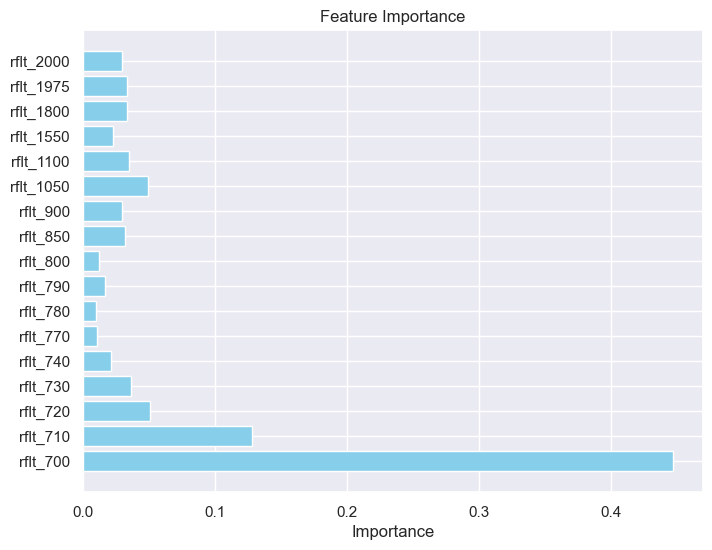

In [142]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
features = Selected_Features  # Replace with your feature names

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

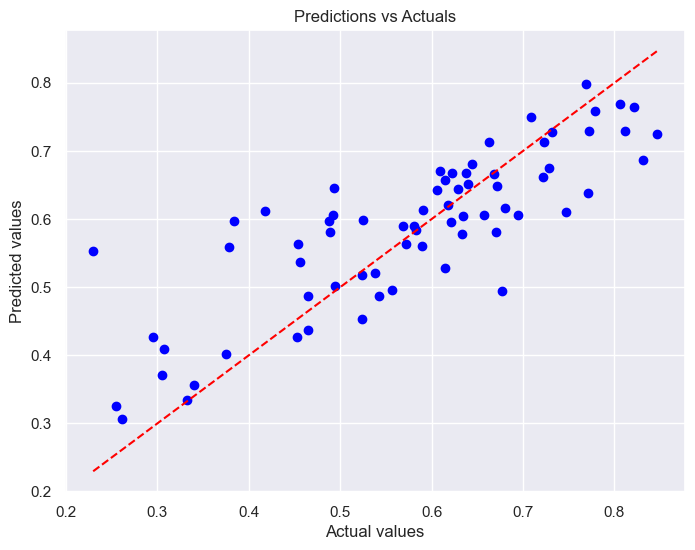

In [143]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line for perfect prediction
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predictions vs Actuals')
plt.show()

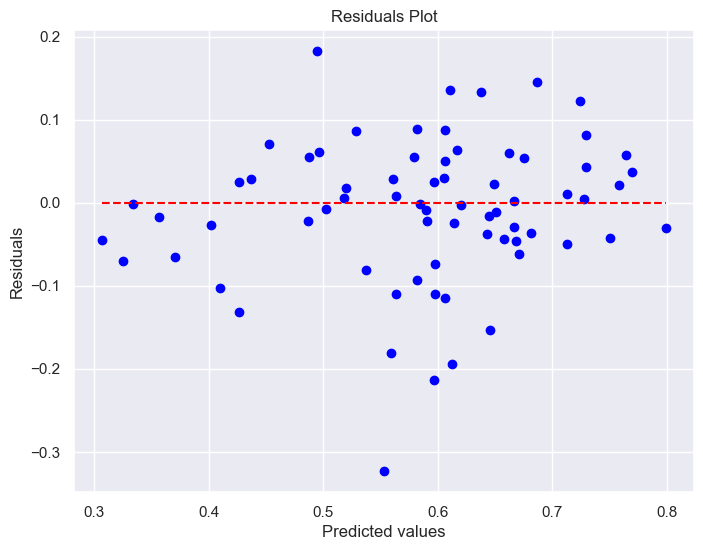

In [144]:
# Residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.hlines(0, xmin=min(y_pred), xmax=max(y_pred), colors='red', linestyles='--')  # Horizontal line at 0
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

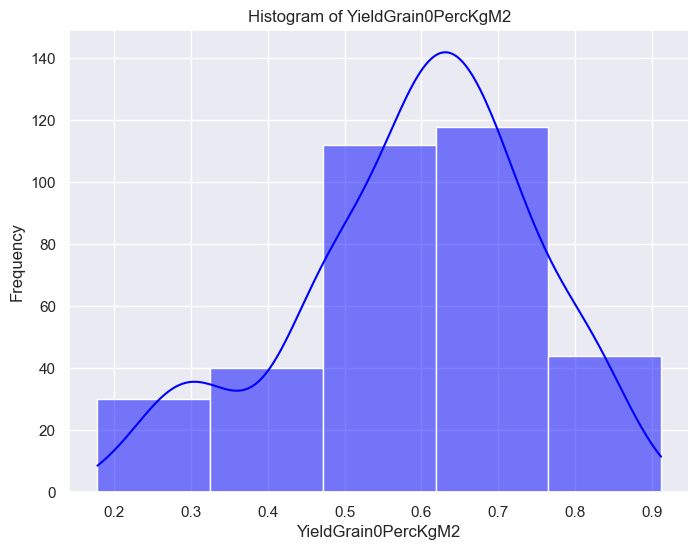

In [167]:
# Create a histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(Final_merged_df_HS_sub_clean['YieldGrain0PercKgM2'], bins=5, kde=True, color='blue')

# Add labels and title
plt.title('Histogram of YieldGrain0PercKgM2')
plt.xlabel('YieldGrain0PercKgM2')
plt.ylabel('Frequency')

# Show the plot
plt.show()